#***Analysing Stock Performance and Building a Dashboard***

*This notebook is part of the IBM Data Analyst Certification projects.*
*© IBM Corporation 2020. All rights reserved.*

##***Using the yfinance Library to Extract Stock Data***

In [2]:
import yfinance as yf
import pandas as pd

***Using the Ticker module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.***

In [3]:
apple = yf.Ticker("AAPL")

***Using the attribute info we can extract information about the stock as a Python dictionary.***

In [4]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

***A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.***

In [5]:
apple_share_price_data = apple.history(period="max")

***The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.***

In [6]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,469033600,0.0,0.0
1980-12-15,0.096096,0.096096,0.095657,0.095657,175884800,0.0,0.0
1980-12-16,0.089075,0.089075,0.088636,0.088636,105728000,0.0,0.0
1980-12-17,0.090830,0.091268,0.090830,0.090830,86441600,0.0,0.0
1980-12-18,0.093463,0.093902,0.093463,0.093463,73449600,0.0,0.0


***We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.***

In [8]:
apple_share_price_data.reset_index(inplace=True)

***We can plot the Open price against the Date:***

<AxesSubplot:xlabel='Date'>

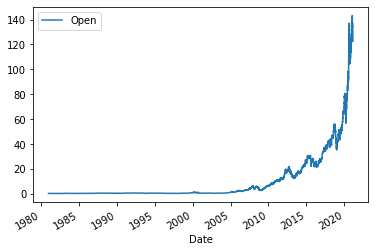

In [9]:
apple_share_price_data.plot(x="Date", y="Open")

***Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.***

In [10]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-02-07    0.192500
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
Name: Dividends, Length: 70, dtype: float64

<AxesSubplot:xlabel='Date'>

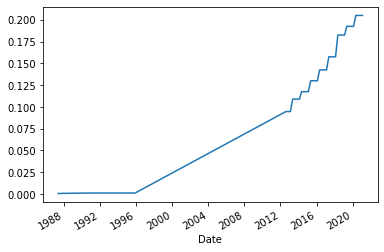

In [11]:
apple.dividends.plot()

***Now we extract some AMD (Advanced Micro Devices) stock data.***

In [15]:
amd = yf.Ticker("AMD")
amd_info = amd.info
amd_info['country']

'United States'

In [14]:
amd_info['sector']

'Technology'

In [13]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.max()

Open            9.786000e+01
High            9.923000e+01
Low             9.625000e+01
Close           9.725000e+01
Volume          3.250584e+08
Dividends       0.000000e+00
Stock Splits    2.000000e+00
dtype: float64

##***Using Web Scraping to Extract Stock Data***

In [17]:
import requests
from bs4 import BeautifulSoup

***Using the requests library to download the webpage https://finance.yahoo.com/quote/AMZN/history?period1=1451606400&period2=1612137600&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true.***

In [18]:
html_data = requests.get("https://finance.yahoo.com/quote/AMZN/history?period1=1451606400&period2=1612137600&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true").text 

***Parsing the html data using beautiful_soup.***

In [19]:
stock_data = BeautifulSoup(html_data, "html.parser")

***Extracting the table with historical share prices and storing it into a dataframe.***

In [20]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

for row in stock_data.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    Open =col[1].text.strip()
    high =col[2].text.strip()
    low =col[3].text.strip()
    close =col[4].text.strip()
    adj_close =col[5].text.strip()
    volume =col[6].text.strip()
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

***Printing out the first five rows of the dataframe we created.***

In [21]:
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","3,206.20","71,529,900"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","3,256.93","77,567,800"
2,"Oct 31, 2020","3,061.74","3,366.80","2,950.12","3,168.04","3,168.04","90,810,500"
3,"Sep 30, 2020","3,208.00","3,496.24","3,019.00","3,036.15","3,036.15","116,242,300"
4,"Aug 31, 2020","3,489.58","3,552.25","2,871.00","3,148.73","3,148.73","115,943,500"


***Filtering data from the dataframe.***

In [22]:
amazon_data[amazon_data["Date"] == "Jun 30, 2019"]

,Date,Open,High,Low,Close,Adj Close,Volume
18,"Jun 30, 2019","1,922.98","2,035.80","1,849.44","1,866.78","1,866.78","73,148,800"


##***Extracting and Visualizing Tesla Stock Data***

*Now when we've learned how to extract data let's perform some analysing and visualizing with real stock data.*

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

***Defing graph function for Stock Data***

In [24]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

***Extracting data into a Pandas Dataframe***

In [25]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

html_data = requests.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue").text
tesla_revenue_data = BeautifulSoup(html_data, "html.parser")
tables = tesla_revenue_data.find_all('table')
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.strip()
        tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

***Removing comma and dolar sing from the Revenue column and removing rows with missing values.***

In [26]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
import numpy as np
tesla_revenue = tesla_revenue.apply(lambda x: x.str.strip()).replace('', np.nan)
tesla_revenue.dropna(axis=0,inplace=True)

***Visualizing the TESLA Stock Data***

In [28]:
tesla_stock_data = make_graph(tesla_data, tesla_revenue, 'Tesla')